<h1 align='center'>Machine Learning lab</h1>
<h3 align='center'>Lab 06</h3>

### Exercise 0: Dataset Preprocessing

#### Importing Packages

In [2]:
import pandas as pd                                      #Importing Pandas
import numpy as np                                       #Importing Numpy
import matplotlib.pyplot as plt                          #Importing Matplotlib
import math                                              #Importing Math
from sklearn.model_selection import train_test_split     #Importing Sklearn Train Test Split
from sklearn.linear_model import SGDRegressor            #Importing Sklearn Stochastic Gradient Descent for Regression 
from sklearn.preprocessing import StandardScaler         #Importing Sklearn Standard Scalar for data Normalization
from sklearn.metrics import mean_squared_error           #Importing Sklearn Mean Square Error
from sklearn.model_selection import GridSearchCV         #Importing Sklearn Grid Search
from sklearn.preprocessing import PolynomialFeatures     #Importing Polynomial Feature
from sklearn.linear_model import LinearRegression, Ridge #Importing Linear Regression and Ridge Regression 

#### Generating a Sample dataset called D1

In [3]:
#Mean of Normal Distribution
mu = 1

#Standard Deviation of Normal Distribution
sigma = 0.05

#Generating Matrix X through Normal Distribution
X = np.random.normal(mu,sigma,size = (100,1))

In [4]:
#Generating Matrix Y using the following function:
# y = 1.3x^2 + 4.8x + 8 + ψ
Y = 1.3 * (X ** 2) + 4.8 * X + 8 + np.random.rand(100,1)

#### Importing Wine Quality Dataset called D2

In [5]:
wine_quality = pd.read_csv('winequality-red.csv',sep=';')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Checking the description of the wine quality dataset
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Exercise 1: Generalized Linear Models with Scikit Learn

#### Splitting the data into Train and Test Splits according to the 80%:20% ratio. Using dataset D2

In [7]:
#Initalizing our Random seed so that our results are consistent
random_seed = 3116

###### Splitting Dataset

In [8]:
#Creating Matrix X for wine quality dataset by dropping label column
wine_quality_X = wine_quality.drop('quality',axis=1)

#Creating Matrix Y for wine quality dataset consisting of only label column
wine_quality_Y = wine_quality['quality']

#Using Train test split from Sklearn package to split my Matrix X and Matrix Y into Training and Testing Set
X_train, X_test, y_train, y_test = train_test_split(wine_quality_X, wine_quality_Y, test_size = 0.2, shuffle = True, random_state = random_seed)

###### Standardization and Normalization of Dataset

In [9]:
#Creating an Object of Standard Scalar from Sklearn for Normalizing my dataset
scalar = StandardScaler()

#Normalizing X_train
X_train = scalar.fit_transform(X_train)

#Normalizing X_test
X_test = scalar.fit_transform(X_test)

#### Picking three sets of hyperparameters and learning each model (without cross validation)

###### Initialization of Alpha's and Lambda's

In [10]:
#Initializing different values of alpha's in a list
alphas = [0.01,0.001,0.0001]

#Initializing different values of lambda's in a list
lambdas = [np.exp(-10),np.exp(-11),np.exp(-12)]

###### Function to fit Linear Model using Stochastic Gradient Descent as an Optimizer

In [11]:
def linear_models_SGD(X_train, y_train, X_test, y_test, penalty_, alphas, lambdas):
    #Initializing Multi-dimensional array to store Training RMSE's
    train_rmse = np.zeros(shape=(len(alphas),))
    
    #Initializing Multi-dimensional array to store Test RMSE's
    test_rmse = np.zeros(shape=(len(alphas),))
    
    #Initializing counter for rmse array with 0
    i = 0
    
    #Iterating over all combinations of Alpha's and Lambda's
    for alpha,lamda in zip(alphas,lambdas):
        #Creating a Model with different Parameters and SGD as an Optimizer
        model = SGDRegressor(loss='squared_loss',penalty=penalty_,random_state=random_seed,learning_rate='constant',eta0=alpha, alpha=lamda)

        #Fitting the created model on the Training dataset
        model.fit(X_train,y_train)

        #Calculating and Storing the Training RMSE on the Training dataset
        train_rmse[i] = mean_squared_error(y_train,model.predict(X_train),squared=False)

        #Calculating and Storing the Test RMSE on the Training dataset
        test_rmse[i] = mean_squared_error(y_test,model.predict(X_test),squared=False)
        
        #Incrementing counter by 1
        i += 1
            
    #Returning the Training and Test RMSE's array
    return train_rmse,test_rmse

##### Ordinary Least Squares

In [12]:
#Fitting Ordinary Least Squares Model with SGD
ols_train_rmse, ols_test_rmse = linear_models_SGD(X_train, y_train, X_test, y_test, 'none', alphas, [0,0,0])

print('The Minimum Train RMSE of Ordinary Least Square is : {} having Alpha: {} and Lambda: {}'
      .format(min(ols_train_rmse),alphas[np.argmin(ols_train_rmse)],0))
print('The Minimum Test RMSE of Ordinary Least Square is : {} having Alpha: {} and Lambda: {}'
      .format(min(ols_test_rmse),alphas[np.argmin(ols_test_rmse)],0))

The Minimum Train RMSE of Ordinary Least Square is : 0.6364969003941113 having Alpha: 0.001 and Lambda: 0
The Minimum Test RMSE of Ordinary Least Square is : 0.6888244104023411 having Alpha: 0.001 and Lambda: 0


##### Ridge Regression

In [13]:
#Fitting Ridge Regression Model with SGD
rr_train_rmse, rr_test_rmse = linear_models_SGD(X_train, y_train, X_test, y_test, 'l2', alphas, lambdas)

print('The Minimum Train RMSE of Ridge Regression is : {} having Alpha: {} and Lambda: {}'
      .format(min(rr_train_rmse),alphas[np.argmin(rr_train_rmse)],lambdas[np.argmin(rr_train_rmse)]))
print('The Minimum Test RMSE of Ridge Regression is : {} having Alpha: {} and Lambda: {}'
      .format(min(rr_test_rmse),alphas[np.argmin(rr_test_rmse)],lambdas[np.argmin(rr_test_rmse)]))

The Minimum Train RMSE of Ridge Regression is : 0.6364968787707496 having Alpha: 0.001 and Lambda: 1.670170079024566e-05
The Minimum Test RMSE of Ridge Regression is : 0.6888237000202886 having Alpha: 0.001 and Lambda: 1.670170079024566e-05


##### LASSO

In [14]:
#Fitting LASSO Regression Model with SGD
lasso_train_rmse, lasso_test_rmse = linear_models_SGD(X_train, y_train, X_test, y_test, 'l1', alphas, lambdas)

print('The Minimum Train RMSE of LASSO Regression is : {} having Alpha: {} and Lambda: {}'
      .format(min(lasso_train_rmse),alphas[np.argmin(lasso_train_rmse)],lambdas[np.argmin(lasso_train_rmse)]))
print('The Minimum Test RMSE of LASSO Regression is : {} having Alpha: {} and Lambda: {}'
      .format(min(lasso_test_rmse),alphas[np.argmin(lasso_test_rmse)],lambdas[np.argmin(lasso_test_rmse)]))

The Minimum Train RMSE of LASSO Regression is : 0.6364969383590316 having Alpha: 0.001 and Lambda: 1.670170079024566e-05
The Minimum Test RMSE of LASSO Regression is : 0.688820228884294 having Alpha: 0.001 and Lambda: 1.670170079024566e-05


#### Plotting Train and Test RMSE on one plot

###### Plotting Train RMSE's Separately

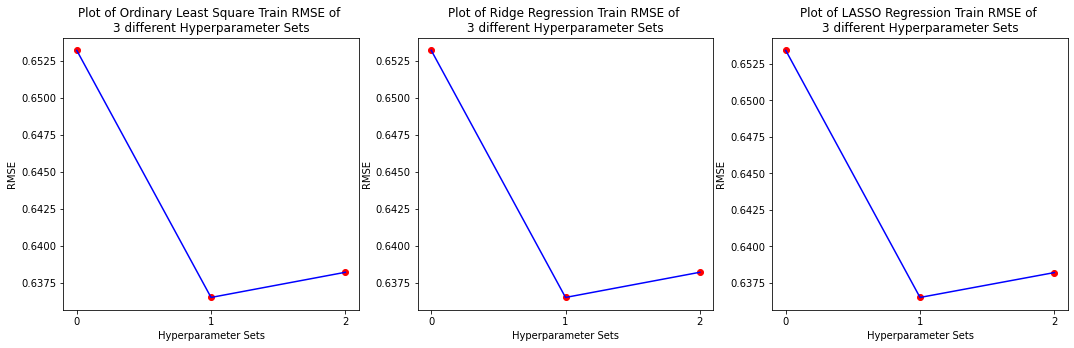

In [15]:
fig = plt.figure(figsize=(18,5))

#Plot of Ordinary Least Squares
plt.subplot(131)
plt.plot(ols_train_rmse,c='b')
plt.scatter(np.arange(0, 3),ols_train_rmse,c='r')
plt.xlabel('Hyperparameter Sets')
plt.ylabel('RMSE')
plt.title('Plot of Ordinary Least Square Train RMSE of \n3 different Hyperparameter Sets')
plt.xticks(np.arange(0, 3))

#Plot of Ridge Regression
plt.subplot(132)
plt.plot(rr_train_rmse,c='b')
plt.scatter(np.arange(0, 3),rr_train_rmse,c='r')
plt.xlabel('Hyperparameter Sets')
plt.ylabel('RMSE')
plt.title('Plot of Ridge Regression Train RMSE of \n3 different Hyperparameter Sets')
plt.xticks(np.arange(0, 3))

#Plot of LASSO Regression
plt.subplot(133)
plt.plot(lasso_train_rmse,c='b')
plt.scatter(np.arange(0, 3),lasso_train_rmse,c='r')
plt.xlabel('Hyperparameter Sets')
plt.ylabel('RMSE')
plt.title('Plot of LASSO Regression Train RMSE of \n3 different Hyperparameter Sets')
plt.xticks(np.arange(0, 3))

plt.show()

###### Plotting Combined Train RMSE's

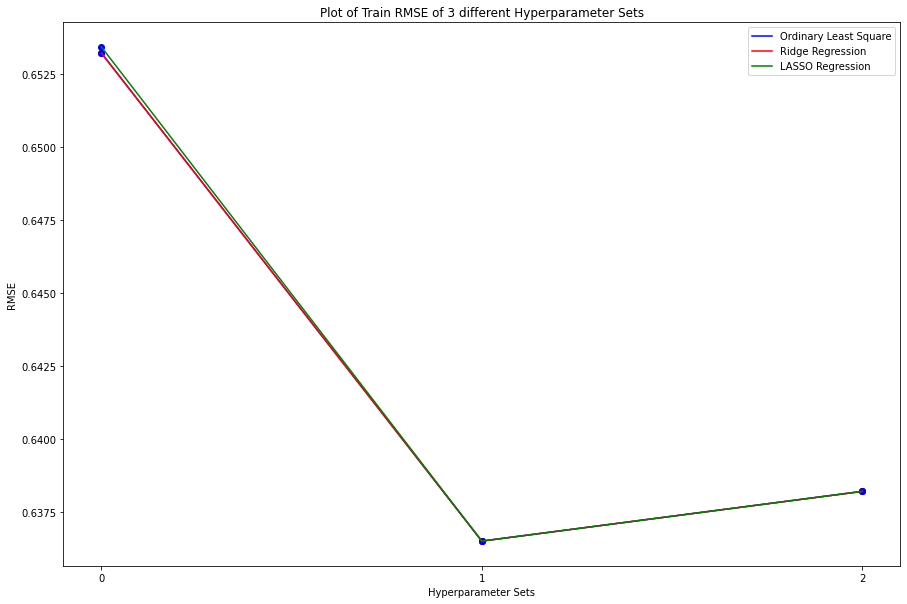

In [16]:
fig = plt.figure(figsize=(15,10))
plt.subplot(111)

#Plot of Ordinary Least Squares
plt.plot(ols_train_rmse,c='b',label='Ordinary Least Square')
plt.scatter(np.arange(0, 3),ols_train_rmse,c='r')

#Plot of Ridge Regression
plt.plot(rr_train_rmse,c='r',label='Ridge Regression')
plt.scatter(np.arange(0, 3),rr_train_rmse,c='b')

#Plot of LASSO Regression
plt.plot(lasso_train_rmse,c='g',label='LASSO Regression')
plt.scatter(np.arange(0, 3),lasso_train_rmse,c='b')

#Setting parameter values for Graph
plt.xlabel('Hyperparameter Sets')
plt.ylabel('RMSE')
plt.title('Plot of Train RMSE of 3 different Hyperparameter Sets')
plt.xticks(np.arange(0, 3))
plt.legend(loc = 1)

plt.show()

###### Plotting Test RMSE's Separately

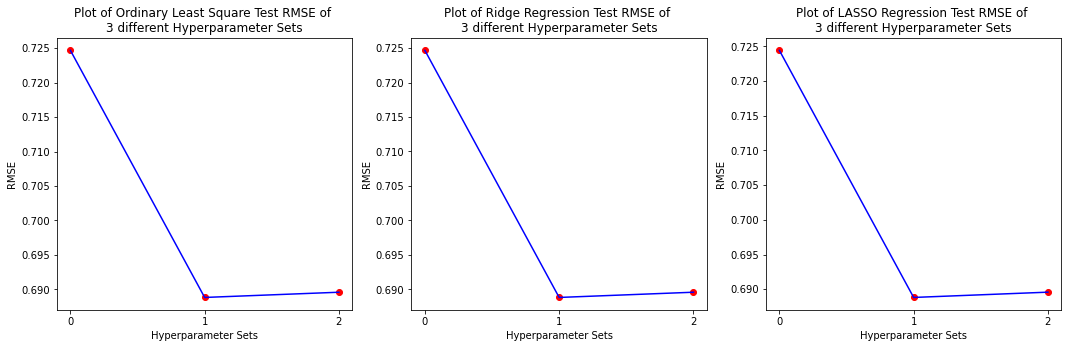

In [17]:
fig = plt.figure(figsize=(18,5))

#Plot of Ordinary Least Squares
plt.subplot(131)
plt.plot(ols_test_rmse,c='b')
plt.scatter(np.arange(0, 3),ols_test_rmse,c='r')
plt.xlabel('Hyperparameter Sets')
plt.ylabel('RMSE')
plt.title('Plot of Ordinary Least Square Test RMSE of \n3 different Hyperparameter Sets')
plt.xticks(np.arange(0, 3))

#Plot of Ridge Regression
plt.subplot(132)
plt.plot(rr_test_rmse,c='b')
plt.scatter(np.arange(0, 3),rr_test_rmse,c='r')
plt.xlabel('Hyperparameter Sets')
plt.ylabel('RMSE')
plt.title('Plot of Ridge Regression Test RMSE of \n3 different Hyperparameter Sets')
plt.xticks(np.arange(0, 3))

#Plot of LASSO Regression
plt.subplot(133)
plt.plot(lasso_test_rmse,c='b')
plt.scatter(np.arange(0, 3),lasso_test_rmse,c='r')
plt.xlabel('Hyperparameter Sets')
plt.ylabel('RMSE')
plt.title('Plot of LASSO Regression Test RMSE of \n3 different Hyperparameter Sets')
plt.xticks(np.arange(0, 3))

plt.show()

###### Plotting Combined Test RMSE's

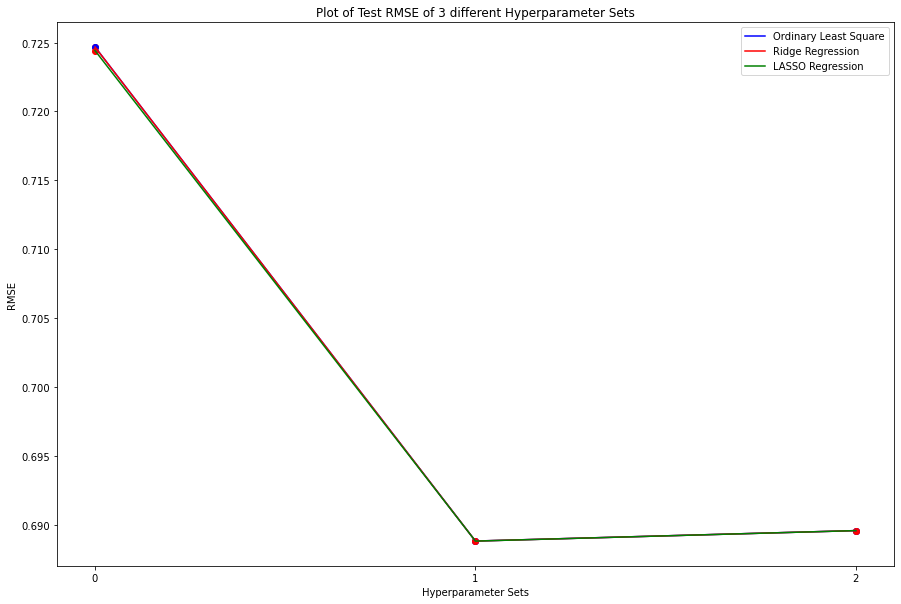

In [18]:
fig = plt.figure(figsize=(15,10))
plt.subplot(111)

#Plot of Ordinary Least Squares
plt.plot(ols_test_rmse,c='b',label='Ordinary Least Square')
plt.scatter(np.arange(0, 3),ols_test_rmse,c='r')

#Plot of Ridge Regression
plt.plot(rr_test_rmse,c='r',label='Ridge Regression')
plt.scatter(np.arange(0, 3),rr_test_rmse,c='b')

#Plot of LASSO Regression
plt.plot(lasso_test_rmse,c='g',label='LASSO Regression')
plt.scatter(np.arange(0, 3),lasso_test_rmse,c='r')

#Setting Parameters for the Graph
plt.xlabel('Hyperparameter Sets')
plt.ylabel('RMSE')
plt.title('Plot of Test RMSE of 3 different Hyperparameter Sets')
plt.xticks(np.arange(0, 3))
plt.legend(loc = 1)

plt.show()

#### Tuning the hyperparameters using scikit learn GridSearchCV and plotting the results of cross validation for each model

###### Function to perform Grid Search over the range of parameters

In [19]:
def grid_search(X_train, y_train, X_test, y_test, penalty_, alphas, lambdas,max_iterations):    
    #Creating a dictionary containing different values for different hyperparameter for Grid Search
    params = {'eta0' : alphas,
              'alpha' : lambdas}
    
    #Creating a GridSearchCV object with all the required configurations and hyperparameters
    model = GridSearchCV(SGDRegressor(loss='squared_loss',penalty=penalty_,max_iter=max_iterations),params,cv=5,return_train_score=True)
    
    #Fitting the GridSearchCV model on the Training dataset
    model.fit(X_train,y_train)
    
    #Calculating and Storing the Training RMSE on the Training dataset
    train_rmse = model.cv_results_['mean_train_score']
    
    #Calculating and Storing the Test RMSE on the Training dataset
    test_rmse = model.cv_results_['mean_test_score']

    ##Returning the GridSearch Model,Training and Test RMSE's array
    return model, train_rmse,test_rmse

##### Ordinary Least Squares

In [20]:
#Fitting Ordinary Least Squares Model with SGD and GridSearchCV
ols_model, ols_train_rmse, ols_test_rmse = grid_search(X_train,y_train,X_test,y_test,'none',alphas,[0,0,0],10000)

print('The Minimum Train RMSE of Ordinary Least Square is : {} having Alpha: {} and Lambda: {}'
      .format(min(ols_train_rmse),ols_model.best_params_['eta0'],ols_model.best_params_['alpha']))
print('The Minimum Test RMSE of Ordinary Least Square is : {} having Alpha: {} and Lambda: {}'
      .format(min(ols_test_rmse),ols_model.best_params_['eta0'],ols_model.best_params_['alpha']))

The Minimum Train RMSE of Ordinary Least Square is : -0.00781187071991043 having Alpha: 0.01 and Lambda: 0
The Minimum Test RMSE of Ordinary Least Square is : -0.04998967304976505 having Alpha: 0.01 and Lambda: 0


##### Ridge Regression

In [21]:
#Fitting Ridge Regression Model with SGD and GridSearchCV
rr_model, rr_train_rmse, rr_test_rmse = grid_search(X_train,y_train,X_test,y_test,'l2',alphas,lambdas,10000)

print('The Minimum Train RMSE of Ridge Regression is : {} having Alpha: {} and Lambda: {}'
      .format(min(rr_train_rmse),rr_model.best_params_['eta0'],rr_model.best_params_['alpha']))
print('The Minimum Test RMSE of Ridge Regression is : {} having Alpha: {} and Lambda: {}'
      .format(min(rr_test_rmse),rr_model.best_params_['eta0'],rr_model.best_params_['alpha']))

The Minimum Train RMSE of Ridge Regression is : -0.007809077818949173 having Alpha: 0.01 and Lambda: 1.670170079024566e-05
The Minimum Test RMSE of Ridge Regression is : -0.04993571411356137 having Alpha: 0.01 and Lambda: 1.670170079024566e-05


##### LASSO

In [22]:
#Fitting LASSO Model with SGD and GridSearchCV
lasso_model, lasso_train_rmse, lasso_test_rmse = grid_search(X_train,y_train,X_test,y_test,'l1',alphas,lambdas,10000)

print('The Minimum Train RMSE of LASSO Regression is : {} having Alpha: {} and Lambda: {}'
      .format(min(lasso_train_rmse),lasso_model.best_params_['eta0'],lasso_model.best_params_['alpha']))
print('The Minimum Test RMSE of LASSO Regression is : {} having Alpha: {} and Lambda: {}'
      .format(min(lasso_test_rmse),lasso_model.best_params_['eta0'],lasso_model.best_params_['alpha']))

The Minimum Train RMSE of LASSO Regression is : -0.007813559008720583 having Alpha: 0.01 and Lambda: 1.670170079024566e-05
The Minimum Test RMSE of LASSO Regression is : -0.04995439820624499 having Alpha: 0.01 and Lambda: 1.670170079024566e-05


#### Plotting the results of cross validation on each Model

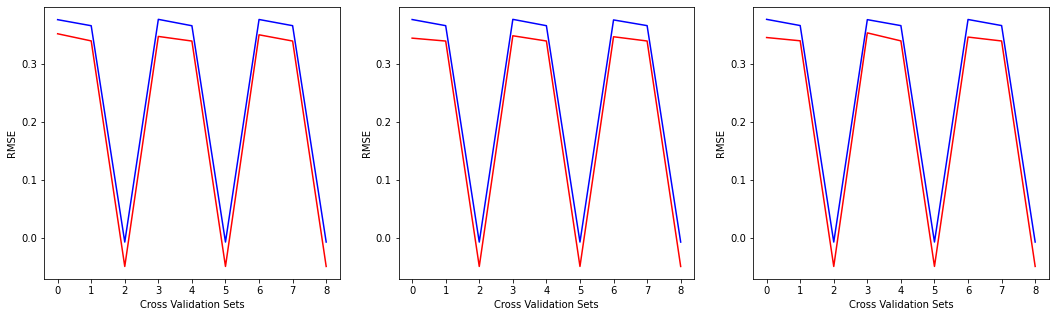

In [23]:
fig = plt.figure(figsize=(18,5))

#Plot of Ordinary Least Squares
plt.subplot(131)
plt.plot(ols_train_rmse,c='b')
plt.plot(ols_test_rmse,c='r')
plt.xlabel('Cross Validation Sets')
plt.ylabel('RMSE')

#Plot of Ridge Regression
plt.subplot(132)
plt.plot(rr_train_rmse,c='b')
plt.plot(rr_test_rmse,c='r')
plt.xlabel('Cross Validation Sets')
plt.ylabel('RMSE')

#Plot of LASSO Regression
plt.subplot(133)
plt.plot(lasso_train_rmse,c='b')
#Scatter plot of Ridge Regression
plt.plot(lasso_test_rmse,c='r')
plt.xlabel('Cross Validation Sets')
plt.ylabel('RMSE')

plt.show()


#### Using the optimal hyperparameter, evaluating each model on the Test Set.

##### Ordinary Least Squares

In [24]:
best_alpha_ols = 0.01
best_lambda_ols = 0

In [25]:
#Initializing the Ordinary Least Square Model with Best and Optimal Hyperparameters
ols_model = SGDRegressor(loss='squared_loss',penalty='none',random_state=random_seed,learning_rate='constant',eta0=best_alpha_ols, alpha=best_lambda_ols)

#Fitting the created model on the Test dataset
ols_model.fit(X_test,y_test)

#Calculating and Storing the Test RMSE on the Test dataset
print('The Test RMSE of Ordinary Least Square on Optimal Parameters is: {}'.format(mean_squared_error(y_test,ols_model.predict(X_test),squared=False)))

The Test RMSE of Ordinary Least Square on Optimal Parameters is: 0.6785250119747812


##### Ridge Regression

In [26]:
best_alpha_rr = 0.01
best_lambda_rr = 1.670170079024566e-05

In [27]:
#Initializing the Ridge Regression Model with Best and Optimal Hyperparameters
rr_model = SGDRegressor(loss='squared_loss',penalty='l2',random_state=random_seed,learning_rate='constant',eta0=best_alpha_rr, alpha=best_lambda_rr)

#Fitting the created model on the Test dataset
rr_model.fit(X_test,y_test)

#Calculating and Storing the Test RMSE on the Test dataset
print('The Test RMSE of Ridge Regression on Optimal Parameters is: {}'.format(mean_squared_error(y_test,rr_model.predict(X_test),squared=False)))

The Test RMSE of Ridge Regression on Optimal Parameters is: 0.6785250904970329


##### LASSO Regression

In [28]:
best_alpha_lasso = 0.01
best_lambda_lasso = 1.670170079024566e-05

In [29]:
#Initializing the LASSO Regression Model with Best and Optimal Hyperparameters
lasso_model = SGDRegressor(loss='squared_loss',penalty='l1',random_state=random_seed,learning_rate='constant',eta0=best_alpha_lasso, alpha=best_lambda_lasso)

#Fitting the created model on the Test dataset
lasso_model.fit(X_test,y_test)

#Calculating and Storing the Test RMSE on the Test dataset
print('The Test RMSE of LASSO Regression on Optimal Parameters is: {}'.format(mean_squared_error(y_test,lasso_model.predict(X_test),squared=False)))

The Test RMSE of LASSO Regression on Optimal Parameters is: 0.6785370573881958


### Exercise 2: Higher Order Polynomial Regression

#### Task A: Prediction with high degree of polynomials

###### Function to Fit Multidimensional Linear Regression with given degree on the dataset

In [30]:
def fit_multidimensional_model(X_train ,y_train, degree):
    #Creating the object of PolynomialFeatures with the provided degree
    p = PolynomialFeatures(degree = degree)
    
    #Fitting and Transforming our dataset into the multidimensional features
    data = p.fit_transform(X_train ,y_train)
    
    #Creating and Fitting a Linear Regression model on our created Polynomial Feature set
    poly_reg = LinearRegression().fit(data ,y_train)
    
    #Calculating our Predicted Y using our Fitted Linear regression Model
    y_pred = poly_reg.predict(data)
    
    #Returning our Predicted Y
    return y_pred

###### Function to Plot our Fitted Multidimensional Linear Regression Models

In [31]:
def plot_multdimensional_model(X_train ,y_train ,y_pred_list ,fig_title ,plot_titles):
    #Calculating number of Rows and Columns for Plotting multiple Graphs as a Subplot
    rows, cols = math.ceil(y_pred_list.shape[1]/2) , 2
    
    #Initializing index for our Subplot to 1
    subplot_index = 1
    
    #Creating a Figure with specific Size and a Title
    fig = plt.figure(figsize = (15,15))
    fig.suptitle(fig_title ,fontsize = 16)
    
    #Iterating over all the provided Y predicted where each Y_pred represent different Polynomial feature set
    for i in range(len(y_pred_list[0])):
        #Creating a subplot with specific Index
        plt.subplot(rows ,cols ,subplot_index)
        
        #Plotting the scatter plot containing our Original Dataset points
        plt.scatter(X_train ,y_train ,label = 'Original Data')
        
        #Sorting and Zipping our X matrix and Predicted Y for Plotting our Linear Regression Curve
        sor_features = sorted(zip(X_train ,y_pred_list[:,i]))
        x_poly, poly_pred = zip(*sor_features)
        
        #Plotting a line plot representing our Fitted Polynomial Linear Regression
        plt.plot(x_poly ,poly_pred ,c = 'r' ,label = 'Fitted Polynomial Approximation')
        
        #Setting values of different Parameters for our Graph
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(plot_titles[i])
        plt.legend()
        
        #Incrementing the Index for our Subplot by 1
        subplot_index += 1
    
    #Showing our Creating Figure containing all the Subplots
    plt.show()

###### Fitting the Polynomial Linear Regression with Different Degree's on our Dataset

In [32]:
#Fitting Polynomial with Degree 1 on our Dataset
p1_y_pred = fit_multidimensional_model(X ,Y ,1)

#Fitting Polynomial with Degree 2 on our Dataset
p2_y_pred = fit_multidimensional_model(X ,Y ,2)

#Fitting Polynomial with Degree 7 on our Dataset
p7_y_pred = fit_multidimensional_model(X ,Y ,7)

#Fitting Polynomial with Degree 10 on our Dataset
p10_y_pred = fit_multidimensional_model(X ,Y ,10)

#Fitting Polynomial with Degree 16 on our Dataset
p16_y_pred = fit_multidimensional_model(X ,Y ,16)

###### Concatenating our Predicted Y for each Degree into a single Multidimensional Array

In [33]:
#Initializing our Final Y_pred with degree 1 y_pred
y_pred = p1_y_pred

#Concatenating y_pred of Degree 2 to our Final Y_pred
y_pred = np.concatenate((y_pred ,p2_y_pred) ,axis = 1)

#Concatenating y_pred of Degree 7 to our Final Y_pred
y_pred = np.concatenate((y_pred ,p7_y_pred) ,axis = 1)

#Concatenating y_pred of Degree 10 to our Final Y_pred
y_pred = np.concatenate((y_pred ,p10_y_pred) ,axis = 1)

#Concatenating y_pred of Degree 16 to our Final Y_pred
y_pred = np.concatenate((y_pred ,p16_y_pred) ,axis = 1)

###### Plotting our Original Dataset and our Fitted Polynomial Linear Regression Model

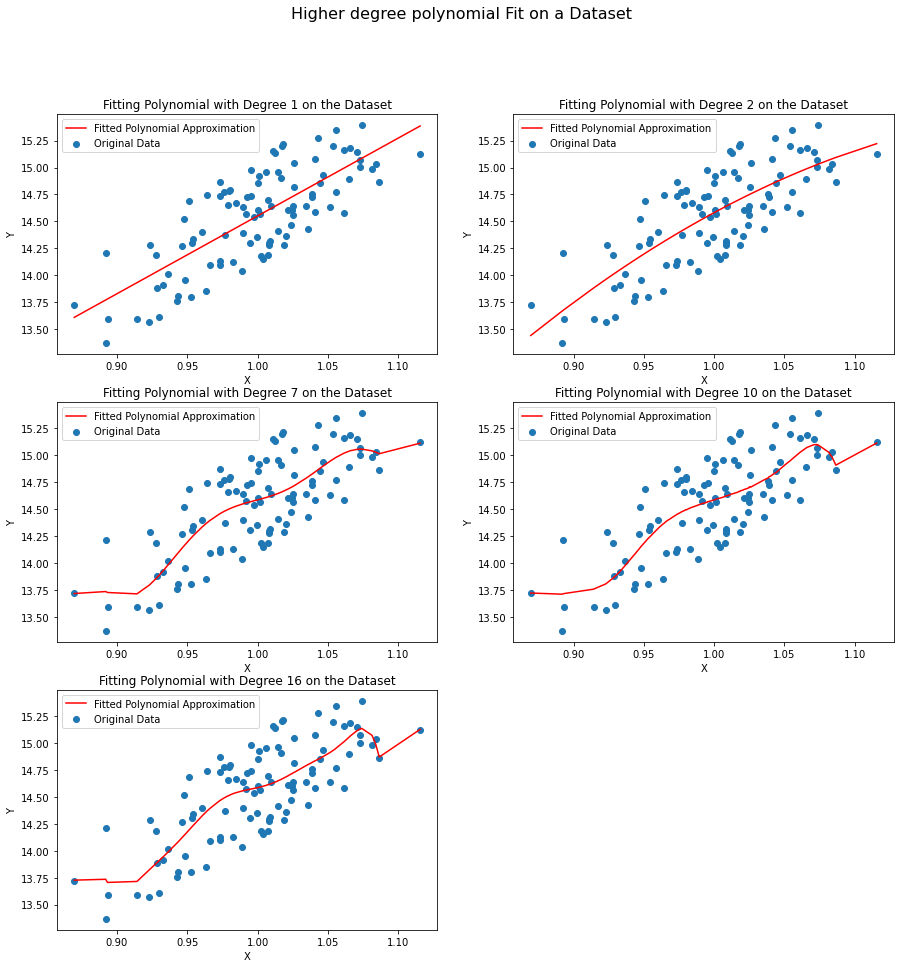

In [34]:
#Initializing the text for the Figure Title
figure_title = 'Higher degree polynomial Fit on a Dataset'

#Creating the Subplot Title array by mapping a function to degree array
plot_titles = list(map(lambda x : 'Fitting Polynomial with Degree {} on the Dataset'.format(x),[1,2,7,10,16]))

#Plotting the final Graph
plot_multdimensional_model(X ,Y ,y_pred ,figure_title ,plot_titles)

#### Task B: Effect of Regularization

###### Function to Fit Multidimensional Ridge Regression with Regularization and given degree on the dataset

In [35]:
def fit_multidimensional_model_regularized(X_train ,y_train ,degree ,lamda):
    #Creating the object of PolynomialFeatures with the provided degree
    p = PolynomialFeatures(degree = degree)
    
    #Fitting and Transforming our dataset into the multidimensional features
    data = p.fit_transform(X_train ,y_train)
    
    #Creating and Fitting a Ridge Regression model with l2 Regularization on our created Polynomial Feature set
    poly_reg = Ridge(alpha = lamda).fit(data ,y_train)
    
    #Calculating our Predicted Y using our Fitted Ridge regression Model
    y_pred = poly_reg.predict(data)
    
    #Returning our Predicted Y
    return y_pred

###### Fitting the Polynomial Ridge Regression with Degree = 10 and different values of λ on our Dataset

In [36]:
#Fitting Polynomial with Degree = 10 and λ = 0 on our Dataset
p0_y_pred = fit_multidimensional_model_regularized(X ,Y ,10 ,0)

#Fitting Polynomial with Degree = 10 and λ = 10^-6 on our Dataset
p6_y_pred = fit_multidimensional_model_regularized(X ,Y ,10 ,10**-6)

#Fitting Polynomial with Degree = 10 and λ = 10^-2 on our Dataset
p2_y_pred = fit_multidimensional_model_regularized(X ,Y ,10 ,10**-2)

#Fitting Polynomial with Degree = 10 and λ = 1 on our Dataset
p1_y_pred = fit_multidimensional_model_regularized(X ,Y ,10 ,1)

###### Concatenating our Predicted Y for each λ into a single Multidimensional Array

In [37]:
#Initializing our Final Y_pred with degree 10 and λ = 0 y_pred
y_pred = p0_y_pred

#Concatenating y_pred of Degree 10 and λ = 10^-6 to our Final Y_pred
y_pred = np.concatenate((y_pred ,p6_y_pred) ,axis = 1)

#Concatenating y_pred of Degree 10 and λ = 10^-2 to our Final Y_pred
y_pred = np.concatenate((y_pred ,p2_y_pred) ,axis = 1)

#Concatenating y_pred of Degree 10 and λ = 1 to our Final Y_pred
y_pred = np.concatenate((y_pred ,p1_y_pred) ,axis = 1)

###### Plotting our Original Dataset and our Fitted Polynomial Ridge Regression Model

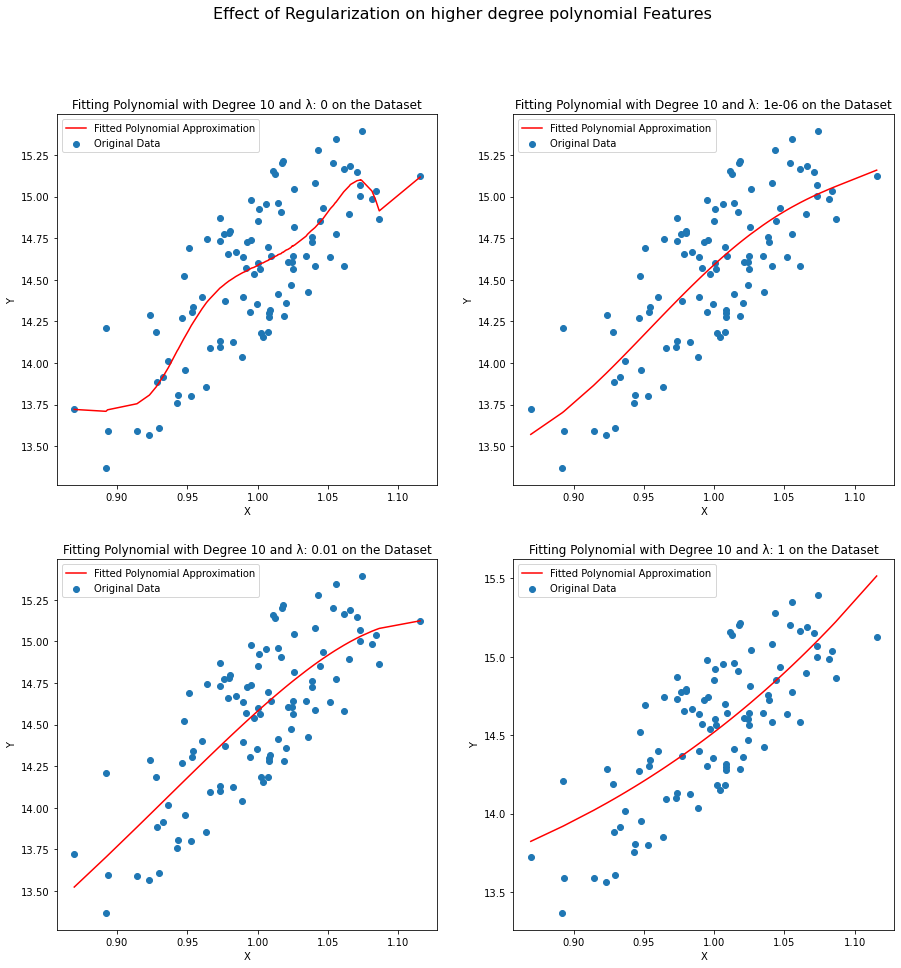

In [38]:
#Initializing the text for the Figure Title
figure_title = 'Effect of Regularization on higher degree polynomial Features'

#Creating the Subplot Title array by mapping a function to Lambda λ array
plot_titles = list(map(lambda x : 'Fitting Polynomial with Degree 10 and λ: {} on the Dataset'.format(x),[0,10**-6,10**-2,1]))

#Plotting the final Graph
plot_multdimensional_model(X ,Y ,y_pred ,figure_title ,plot_titles)

# Exercise 3: Implementing Coordinate Descent

##### Splitting Wine Quality Dataset into X and Y matrix

In [39]:
#Appending a Bias Column in the starting of Wine Quality X matrix
wine_quality_X = np.append(np.ones(shape = (len(wine_quality_X) ,1)) ,wine_quality_X ,axis = 1)

#Reshaping the Wine Quality Y vector into a Column Vector
wine_quality_Y = wine_quality_Y.to_numpy().reshape(-1 ,1)

##### Splitting Wine Quality Matrix X and Y into Training and Test Sets

In [40]:
#Using the Sklearn train_test_split function to split my dataset into training and test sets
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_quality_X, wine_quality_Y, test_size = 0.2, 
                                                                        shuffle = True, random_state = random_seed)

#### Implementation of Coordinate Descent

###### Function to return soft threshold value between two scalar values

In [41]:
def soft(x ,epsilon):
    if x > epsilon:
        return x - epsilon
    elif np.abs(x) <= epsilon:
        return 0
    elif x < -epsilon:
        return x + epsilon

###### Function to calculate the Gradient of the given Dataset

In [42]:
def calculate_g(X_train ,y_train ,beta ,m ,regularized ,lamda):
    #Removing the column m from the X train
    X_train_m = np.delete(X_train ,[m] ,axis = 1)
    
    #Converting the Beta vector into the Column Vector
    beta = beta.reshape(-1 ,1)
    
    #Extracting only the Column m from the X train
    xm = X_train[:,m]
    
    #If regularization is True than returning the regularized gradient with the regularized term included
    if regularized:
        #Calculating the regularized term:
        # reg = 0.5 * λ / Xm.T * Xm
        regularized_term = (0.5 * lamda) / (np.dot(xm.T ,xm))
        
        #Returning the Soft Threshold value between gradient and regularized term
        return soft(np.dot(np.subtract(y_train,np.dot(X_train_m ,beta)).T ,xm)/np.dot(xm.T ,xm) ,regularized_term)
    
    #If Regularization is False, then returning the simple Gradient
    return np.dot(np.subtract(y_train ,np.dot(X_train_m ,beta)).T ,xm)/np.dot(xm.T ,xm)

###### Function to calculate the Loss value for the Coordinate Descent

In [43]:
def calculate_fbeta(X_train ,y_train ,beta ,regularized ,lamda):
    #Reshaping the beta vector into Column vector
    beta = beta.reshape(-1,1)
    
    #If regularization is True, then adding the regularized term in our Loss function
    if regularized:
        #Returning the the regularized Loss value:
        # f (Bˆ) = (y − XBˆ).T (y − XBˆ) + λ||B||1
        return np.dot(np.subtract(y_train ,np.dot(X_train ,beta)).T ,np.subtract(y_train ,np.dot(X_train ,beta))) + (lamda * np.sum(beta))
    
    #If regularization is False, then returning the simple Loss value:
    # f (Bˆ) = (y − XBˆ).T (y − XBˆ)
    return np.dot(np.subtract(y_train ,np.dot(X_train ,beta)).T ,np.subtract(y_train ,np.dot(X_train ,beta)))

###### Function to Minimize the Coordinate Descent

In [44]:
def minimize_CD(X_train ,y_train ,beta ,alpha ,imax ,epsilon ,regularized ,lamda):
    #Creating a Multidimensional Array to store the history of Beta values
    beta_hist = np.zeros(shape=(len(beta) ,imax))
    
    #Iterating over all the iterations
    for i in range(1,imax):
        #Copying the previous Beta values to current Iteration beta values
        beta_hist[:,i] = beta_hist[:,i-1].copy()
        
        #Iterating over all the individual values of a single beta vector or every coordinate of our beta vector
        for n in range(len(beta)):
            #Removing the nth element from the beta column vector
            beta_i = np.delete(beta_hist ,n ,axis=0)
            
            #Calculating the gradient without the nth element in the beta vector
            beta_hist[n,i] = calculate_g(X_train ,y_train ,beta_i[:,i] ,n ,regularized ,lamda)
            
            #Checking the Stopping condition
            if calculate_fbeta(X_train ,y_train ,beta_hist[:,i-1] ,regularized ,lamda) - calculate_fbeta(X_train ,y_train ,beta_hist[:,i] ,regularized ,lamda) < epsilon:
                #Returning the all the beta history
                return np.delete(beta_hist ,np.arange(i+1,imax) ,axis = 1)
    
    #Returning the all the beta history
    return beta_hist

###### Function to fit the Linear Regression Model using the Coordinate Descent

In [45]:
def learn_linreg_CD(X_train ,y_train ,imax ,epsilon ,alpha ,regularized ,lamda):
    #Initializing a beta vector with zeros
    beta = np.zeros(shape=(len(X_train[0]) ,1))
    
    #Returning and Minimizing the Coordinate descent to find the optimal Beta vector
    return minimize_CD(X_train ,y_train ,beta ,alpha ,imax ,epsilon ,regularized ,lamda)

##### Coordinate Descent Without Regularization

In [46]:
beta = learn_linreg_CD(wine_X_train ,wine_y_train ,1000 ,10**-10 ,0.001 ,False ,0)

###### Plotting the Beta History without Regularization

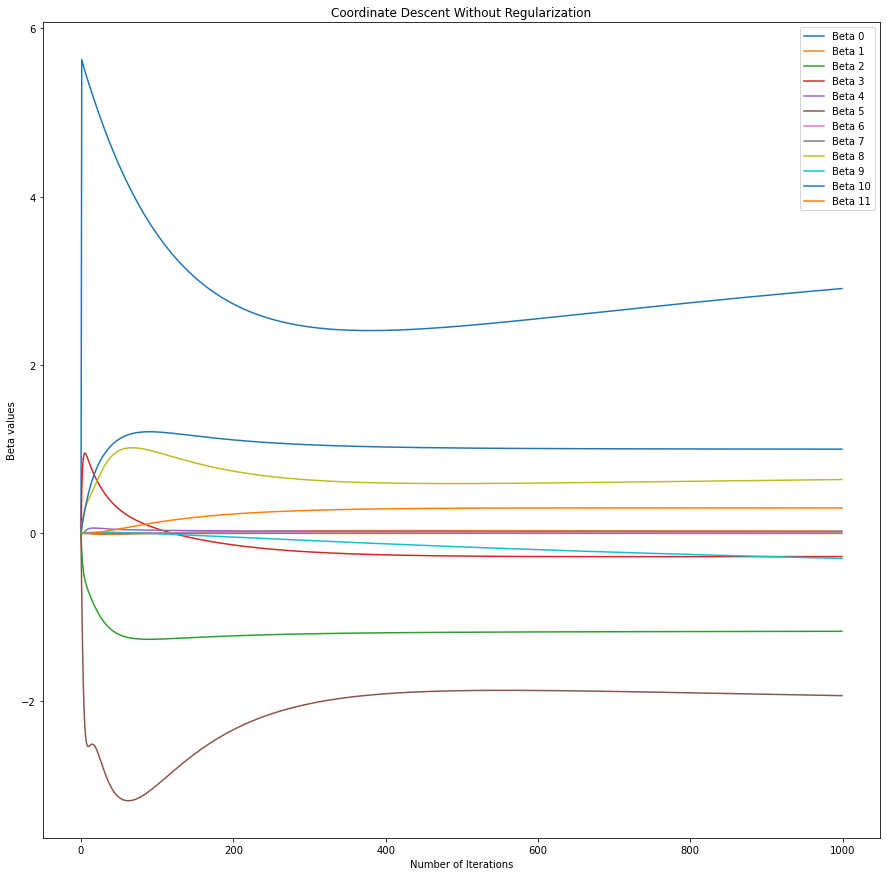

In [47]:
#Creating a Figure with specific Size
fig = plt.figure(figsize=(15 ,15))

#Adding a Subplot
plt.subplot(111)

#For each beta vector, plotting it as a Line graph
for i in range(len(beta)):
    plt.plot([j for j in range(len(beta[0]))] ,beta[i,:] ,label = 'Beta {}'.format(i))

#Setting some parameters for the graph
plt.xlabel('Number of Iterations')
plt.ylabel('Beta values')
plt.title('Coordinate Descent Without Regularization')
plt.legend(loc = 1)

##### Coordinate Descent With Regularization

In [48]:
beta = learn_linreg_CD(wine_X_train ,wine_y_train ,1000 ,10**-2 ,0.001 ,True ,np.exp(-2))

###### Plotting the Beta History with Regularization

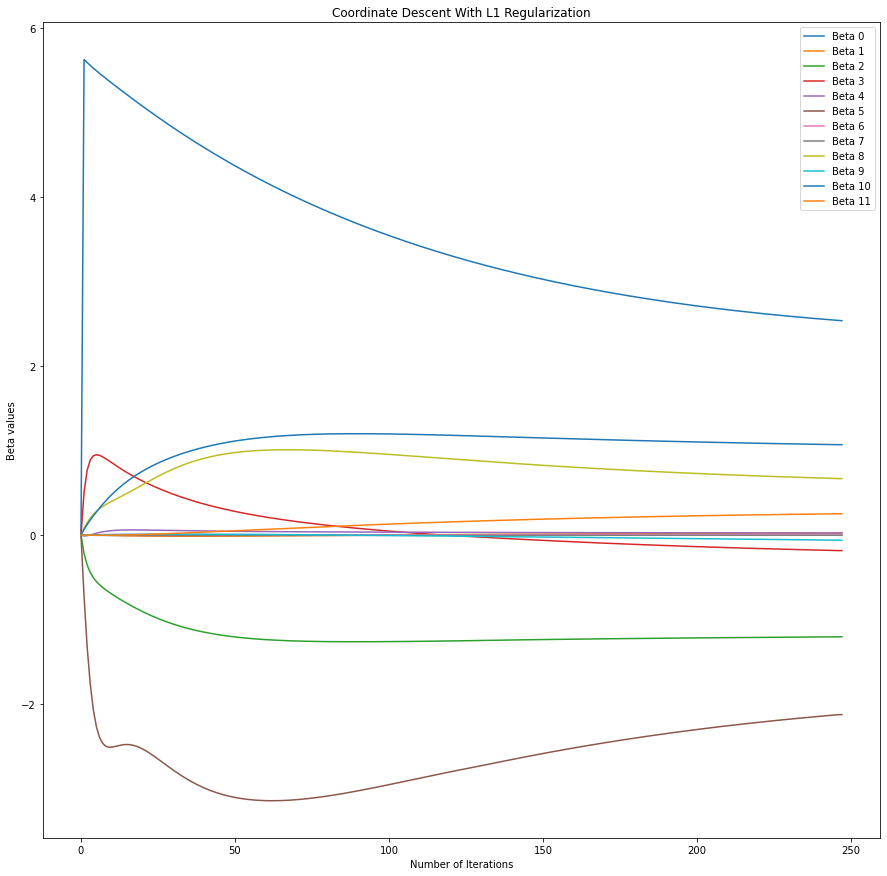

In [49]:
#Creating a Figure with specific Size
fig = plt.figure(figsize=(15 ,15))

#Adding a Subplot
plt.subplot(111)

#For each beta vector, plotting it as a Line graph
for i in range(len(beta)):
    plt.plot([j for j in range(len(beta[0]))] ,beta[i,:] ,label = 'Beta {}'.format(i))

#Setting some parameters for the graph
plt.xlabel('Number of Iterations')
plt.ylabel('Beta values')
plt.title('Coordinate Descent With L1 Regularization')
plt.legend(loc = 1)

##### Task C: Comparison